In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline 
from glob import glob
import os 
from pathlib import Path
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import  plotly.express  as  px
import jovian



Overview of the Dataset:

The Canada immigration dataset provides a comprehensive view of immigration patterns to Canada over a span of several decades. The dataset covers the period from 1980 to 2010 and includes a variety of variables that capture different aspects of immigration dynamics.

Key variables included in the dataset are:

Country of Origin: This variable indicates the country from which immigrants to Canada originated. It provides insights into the geographical distribution of immigrants and allows for the analysis of immigration patterns by region, continent, and country.

Continent: The dataset includes information on the continent to which each country belongs. This variable allows for the analysis of immigration trends at a continental level, providing insights into global migration patterns.

Region: Additionally, the dataset provides information on the region to which each country belongs. This variable further refines the analysis of immigration patterns by providing insights into migration trends within specific geographical areas.

Development Status (DevName): Each country in the dataset is classified as either a developed nation or a developing nation. This classification is based on the country's level of economic development and provides important context for understanding immigration dynamics.

Year: The dataset contains data for each year from 1980 to 2010, allowing for the examination of immigration trends over time.



Overall, the Canada immigration dataset offers a rich source of data for analyzing immigration trends and patterns, with variables that capture geographical, temporal, and socio-economic dimensions of migration. This dataset is valuable for policymakers, researchers, and stakeholders interested in understanding and addressing immigration-related issues in Canada and beyond.







In [4]:
project = 'eda_immigration_to_canada_from_1980_2013'
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "ubiorukevwe/eda_immigration_to_canada_from_1980_2013"
[jovian] Committed successfully! https://jovian.com/ubiorukevwe/eda-immigration-to-canada-from-1980-2013


'https://jovian.com/ubiorukevwe/eda-immigration-to-canada-from-1980-2013'

In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
df=pd.read_csv(URL)
df1=df.copy()
df1.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [6]:
df1.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [7]:
year = list(map(str,range(1980,2014)))
print(year,end='')

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

In [8]:
#What is the total number of immigrants to Canada over the years covered by the dataset?
total_number_immigrant = df[year].sum().to_frame().reset_index().rename(columns={0:'total','index':'year'}).sort_values(by='total', ascending = False )
total_number_immigrant

,year,total
30,2010,276956
33,2013,257537
25,2005,257457
32,2012,256222
29,2009,248768
26,2006,247057
31,2011,246194
28,2008,243047
21,2001,242643
27,2007,232405


the immigration to canada is an upward trend  and tend to increase as the year increase and the population of immigrant to canada increased

In [9]:
#What is the trend of immigration over the years?
df_year=df1[year].sum()
fig = px.line(df_year, x=df_year.index, y=df_year.values, title='immigration trend to canada')
fig.show()


Text(0.5, 1.0, 'immigration trend  from 1980 to 2010')

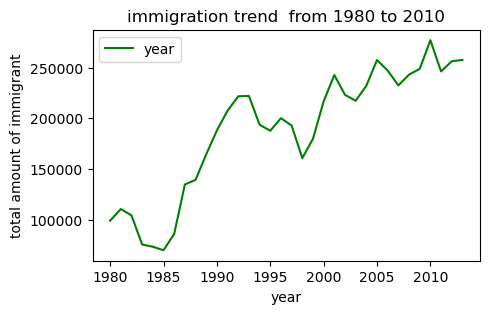

In [266]:
#What is the trend of immigration over the years?

plt.figure(figsize = (5,3))
df1[year].sum().plot(kind='line', color ='g')
plt.ylabel('total amount of immigrant')
plt.xlabel('year')
plt.legend({'year':'name'})
plt.title('immigration trend  from 1980 to 2010')

  the movement of people from different nation to canada increase  from 1980 to 2010 and there is a little drop in immgration because from the dip of the graph  at 1985 and 2000 

In [10]:
#Which countries are the top 10 sources of immigrants to Canada?
df_country = df1.groupby('Country')[year].sum().stack().reset_index().rename(columns={'level_1':'year',0:'total'}).sort_values(by = 'total', ascending = False)
df_country

,Country,year,total
1249,China,2005,42584
6236,United Kingdom of Great Britain and Northern I...,1994,39231
4654,Philippines,2010,38617
4655,Philippines,2011,36765
1248,China,2004,36619
...,...,...,...
1299,"China, Macao Special Administrative Region",1987,0
1298,"China, Macao Special Administrative Region",1986,0
1297,"China, Macao Special Administrative Region",1985,0
1296,"China, Macao Special Administrative Region",1984,0


In [11]:
# total number of immigrant by continent
df_continent = df1.groupby('Continent')[year].sum()
df_continent
fig= px.bar(df_continent,x=df_continent.index)
fig.show()

Text(0.5, 1.0, 'trend of movemnet of iimigrant to canada from 1980 to 2010')

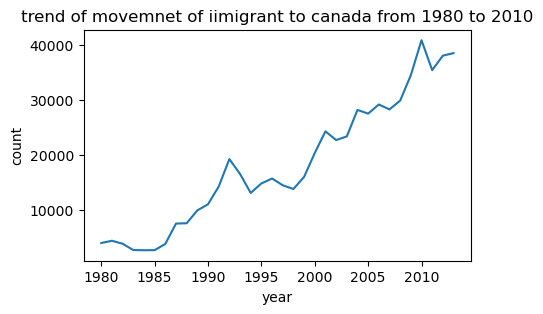

In [12]:
#the trend of immigration to canada  from african
plt.figure(figsize=(5,3))
df_african = df1[df1['Continent']=='Africa'][year].sum()
df_african.plot(kind='line')
plt.xlabel('year')
plt.ylabel('count')
plt.title('trend of movemnet of iimigrant to canada from 1980 to 2010')

Text(0.5, 1.0, 'immigration to canada from africa')

<Figure size 500x300 with 0 Axes>

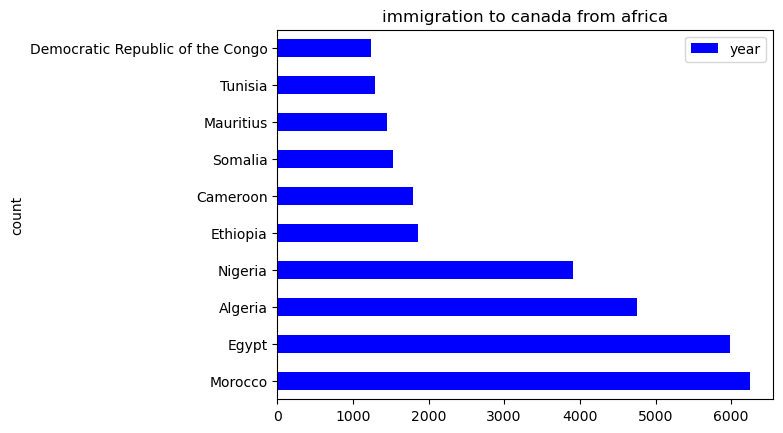

In [13]:
# the top ten country  immigrant from africa 
df2 =df1.reset_index().copy()
df2 = df2[df2['Continent']=='Africa'].groupby('Country')[year].sum()
df3 =pd.DataFrame(df2['2010']).rename(columns={'2010':'year'}).sort_values(by='year',ascending = False )[:10]
plt.figure(figsize=(5,3))
df3.plot(kind='barh', color = 'b')
plt.ylabel('count')
plt.title('immigration to canada from africa')






Text(0.5, 1.0, 'immigration to canada from africa')

<Figure size 500x300 with 0 Axes>

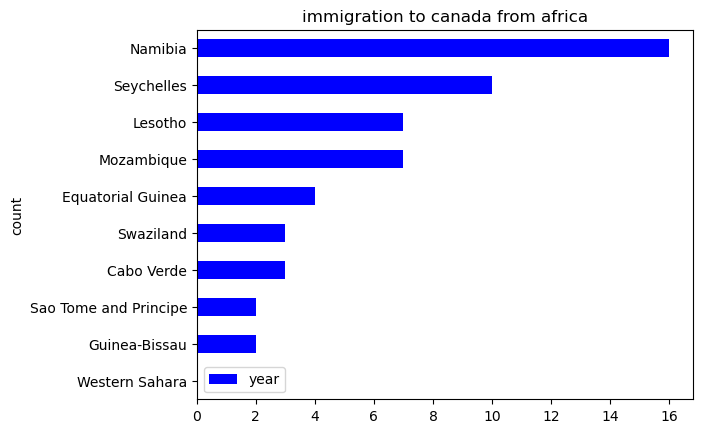

In [14]:
# bottom ten country immigration from africa to canada
df2 =df1.reset_index().copy()
df2 = df2[df2['Continent']=='Africa'].groupby('Country')[year].sum()
df3 =pd.DataFrame(df2['2010']).rename(columns={'2010':'year'}).sort_values(by='year',ascending = True  )[:10]
plt.figure(figsize=(5,3))
df3.plot(kind='barh', color = 'b')
plt.ylabel('count')
plt.title('immigration to canada from africa')

Text(0.5, 1.0, 'immigration to canada from Asian')

<Figure size 500x300 with 0 Axes>

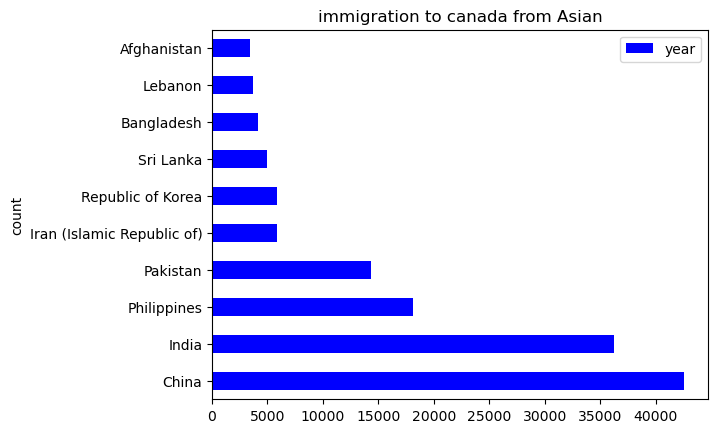

In [15]:
#top ten country immigration from asia to canada  in year 2005
df2 =df1.reset_index().copy()
df2 = df2[df2['Continent']=='Asia'].groupby('Country')[year].sum()
df3 =pd.DataFrame(df2['2005']).rename(columns={'2005':'year'}).sort_values(by='year',ascending = False)[:10]
plt.figure(figsize=(5,3))
df3.plot(kind='barh', color = 'b')
plt.ylabel('count')
plt.title('immigration to canada from Asian')

<Axes: >

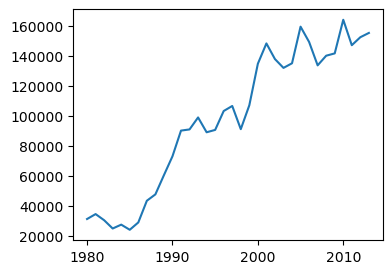

In [16]:
#the trend of immigration  from asian  couninent to canada
plt.figure(figsize=(4,3))
df_african = df1[df1['Continent']=='Asia'][year].sum()
df_african.plot(kind='line')


Text(0.5, 1.0, 'immigration to canada from Asian')

<Figure size 400x300 with 0 Axes>

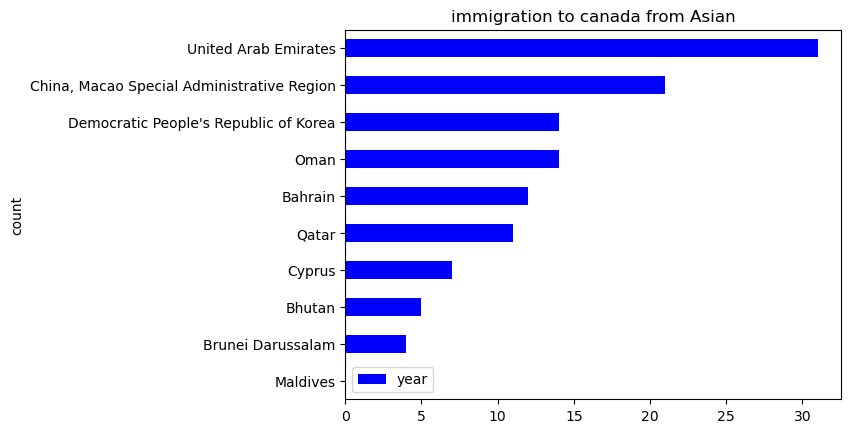

In [17]:
#bottom  ten country immigration from asia to canada  in year 2005
df2 =df1.reset_index().copy()
df2 = df2[df2['Continent']=='Asia'].groupby('Country')[year].sum()
df3 =pd.DataFrame(df2['2005']).rename(columns={'2005':'year'}).sort_values(by='year',ascending = True)[:10]
plt.figure(figsize=(4,3))
df3.plot(kind='barh', color = 'b')
plt.ylabel('count')
plt.title('immigration to canada from Asian')

Analysis of immigration patterns by continent and region unveiled diverse trends in migration dynamics. Notably, immigration from Asia demonstrated a pronounced dominance by countries like India and China, indicating concentrated migration flows from populous nations within the region. Conversely, immigration from Europe exhibited a more evenly distributed pattern across different countries. This observation suggests a more balanced dispersion of migrants from various European nations, possibly influenced by historical, cultural, and economic factors shaping migration patterns within the continent.

<Axes: >

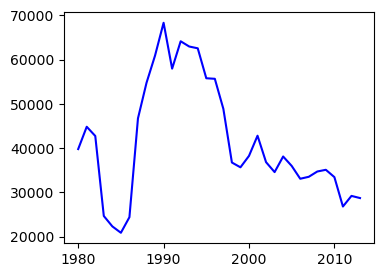

In [18]:
#the trend of immigration from europe to canada 
plt.figure(figsize=(4,3))
df_african = df1[df1['Continent']=='Europe'][year].sum()
df_african.plot(kind='line', color ='b')

the trend has been a downward trend of the immigration of poeple from europe and there is a greater dip in 1985 of the total number of immigrant to europe. the maximum amount of immigrant to canada from europe was withness in the year 1990 and since then the graph has been on a downward spiral movement. now let take a look at the numeber of immigrant to canada in the year 1990

Text(0.5, 1.0, 'immigration to canada from Europe')

<Figure size 400x300 with 0 Axes>

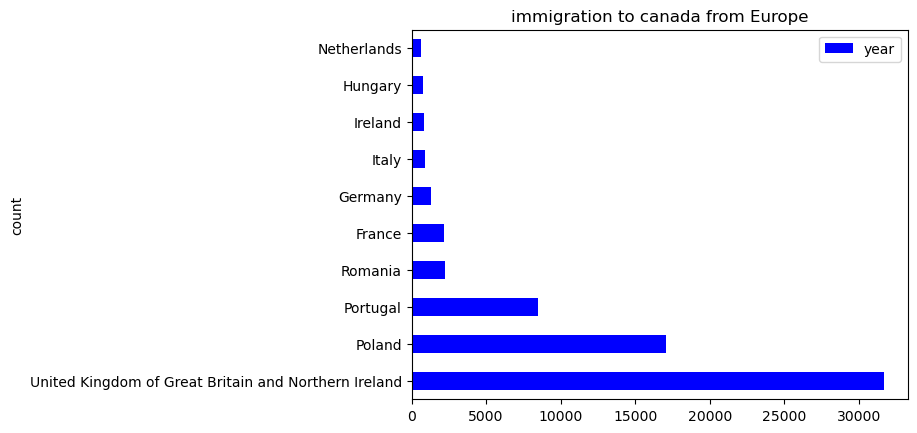

In [19]:
# the top ten country immigration to canada from europe
df2 =df1.reset_index().copy()
df2 = df2[df2['Continent']=='Europe'].groupby('Country')[year].sum()
df3 =pd.DataFrame(df2['1990']).rename(columns={'1990':'year'}).sort_values(by='year',ascending = False  )[:10]
plt.figure(figsize=(4,3))
df3.plot(kind='barh', color = 'b')
plt.ylabel('count')
plt.title('immigration to canada from Europe')

Text(0.5, 1.0, 'immigration to canada from Europe')

<Figure size 400x300 with 0 Axes>

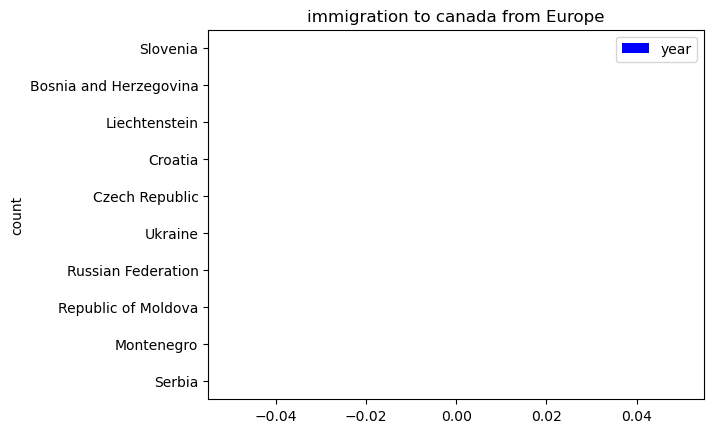

In [241]:
# bottom  ten country immigration to canada from europe
df2 =df1.reset_index().copy()
df2 = df2[df2['Continent']=='Europe'].groupby('Country')[year].sum()
df3 =pd.DataFrame(df2['1990']).rename(columns={'1990':'year'}).sort_values(by='year',ascending = True  )[:10]
plt.figure(figsize=(4,3))
df3.plot(kind='barh', color = 'b')
plt.ylabel('count')
plt.title('immigration to canada from Europe')

<Axes: >

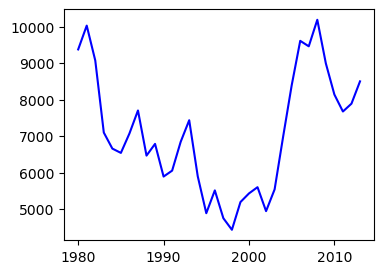

In [20]:
#the trend of immigration from north america to canada 
plt.figure(figsize=(4,3))
df_african = df1[df1['Continent']=='Northern America'][year].sum()
df_african.plot(kind='line', color ='b')

 from the graph united kingdom have the higest number of immigrant to canada follow by poland

Text(0.5, 1.0, 'immigration to canada from North america')

<Figure size 400x300 with 0 Axes>

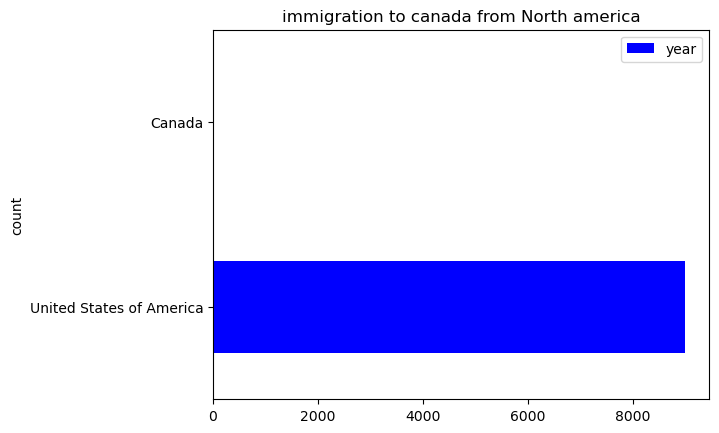

In [21]:
# the top ten country immigration to canada from europe
df2 =df1.reset_index().copy()
df2 = df2[df2['Continent']=='Northern America'].groupby('Country')[year].sum()
df3 =pd.DataFrame(df2['2009']).rename(columns={'2009':'year'}).sort_values(by='year',ascending = False  )[:10]
plt.figure(figsize=(4,3))
df3.plot(kind='barh', color = 'b')
plt.ylabel('count')
plt.title('immigration to canada from North america')

<Axes: >

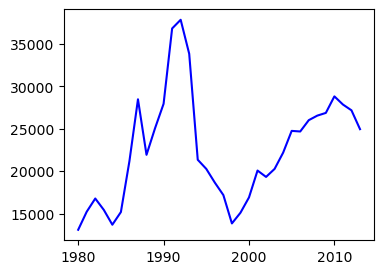

In [22]:
#the trend of immigration from europe to canada 
plt.figure(figsize=(4,3))
df_african = df1[df1['Continent']=='Latin America and the Caribbean'][year].sum()
df_african.plot(kind='line', color ='b')

Text(0.5, 1.0, 'immigration to canada from Latin america')

<Figure size 400x300 with 0 Axes>

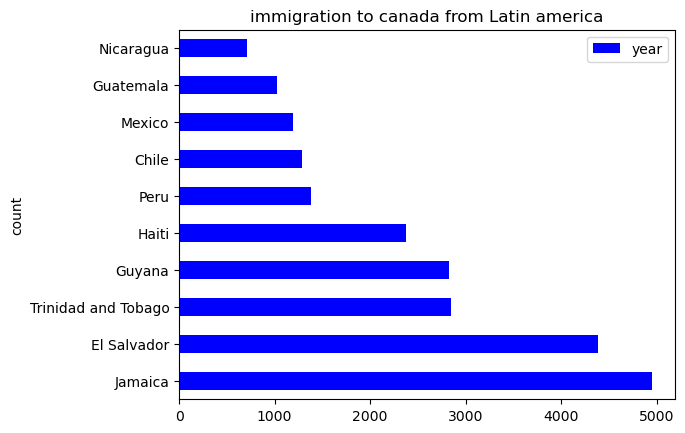

In [239]:
# the top ten country immigration to canada from latin america
df2 =df1.reset_index().copy()
df2 = df2[df2['Continent']=='Latin America and the Caribbean'].groupby('Country')[year].sum()
df3 =pd.DataFrame(df2['1990']).rename(columns={'1990':'year'}).sort_values(by='year',ascending = False  )[:10]
plt.figure(figsize=(4,3))
df3.plot(kind='barh', color = 'b')
plt.ylabel('count')
plt.title('immigration to canada from Latin america')

Text(0.5, 1.0, 'immigration to canada from Latin america')

<Figure size 400x300 with 0 Axes>

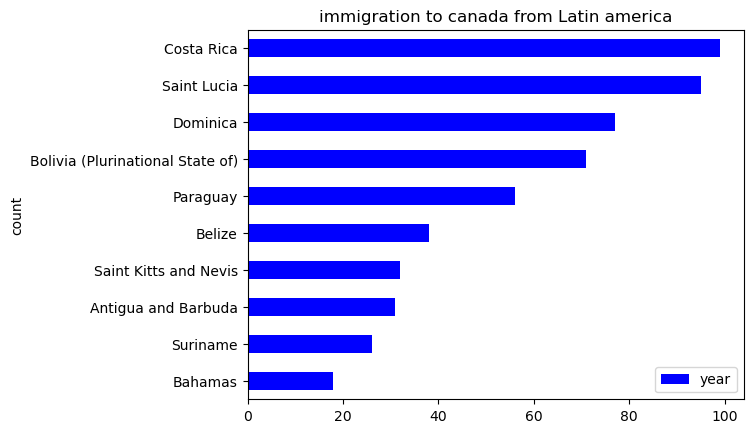

In [23]:
#  bottom  ten country immigration to canada from latin america
df2 =df1.reset_index().copy()
df2 = df2[df2['Continent']=='Latin America and the Caribbean'].groupby('Country')[year].sum()
df3 =pd.DataFrame(df2['1990']).rename(columns={'1990':'year'}).sort_values(by='year',ascending = True)[:10]
plt.figure(figsize=(4,3))
df3.plot(kind='barh', color = 'b')
plt.ylabel('count')
plt.title('immigration to canada from Latin america')

Text(0.5, 0.98, 'total immigration ')

<Figure size 400x300 with 0 Axes>

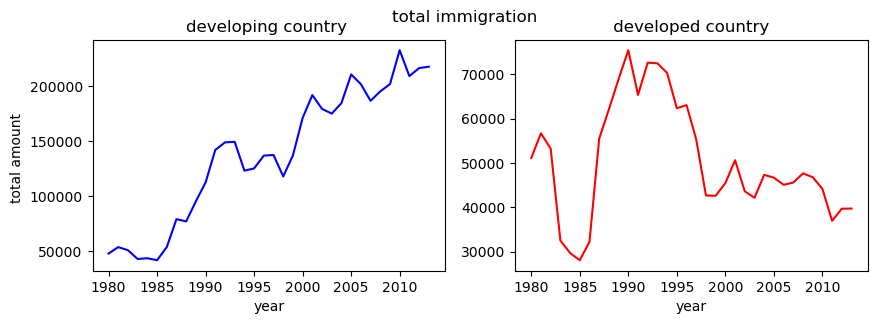

In [24]:
#the trend of immigration from Developed and developing nation  to canada 
plt.figure(figsize=(4,3))
fig,ax= plt.subplots(1,2,figsize =(10,3))
df_african = df1[df1['DevName']=='Developing regions'][year].sum()
df_african.plot(kind='line', color ='b', ax=ax[0],title=('developing country '), xlabel= ('year'), ylabel=('total amount '))

df_african = df1[df1['DevName']=='Developed regions'][year].sum()
df_african.plot(kind='line', color ='r', ax=ax[1])
plt.xlabel('year')
plt.title(' developed country ')
plt.suptitle('total immigration ')


Immigration Trends Over Time: The analysis revealed a general upward trend in immigration to Canada over the period from 1980 to 2010. While there were fluctuations from year to year, overall immigration numbers increased steadily over time.

Top Source Countries of Immigrants: India, China, and the Philippines emerged as the top three source countries of immigrants to Canada. These countries consistently contributed a significant number of immigrants across the years covered by the dataset.


Immigration Patterns by Continent and Region: Analysis by continent and region revealed varying immigration patterns. For example, immigration from Asia was dominated by countries such as India and China, while immigration from Europe was more evenly distributed among different countries and united kingdom top the list of country that migrate to canada. in africa immigration is mostly dominated my morocco, eygpt and algeria  from  north africa  . while in west afriac is dominated by nigeria immigrant.

Development Status of Source Countries: The dataset categorized source countries into developed and developing nations. Analysis showed that immigration from  developing countries contributed significantly to overall immigration to Canada, highlighting the diverse origins of immigrants.there is a decline of immigration from  developed country because of the decline in movement of the graph downwardly

 th is  exploratory analysis provided valuable insights into immigration trends and patterns in Canada. These findings can inform policymakers, researchers, and stakeholders in understanding the dynamics of immigration and formulating policies to address the needs of immigrant communities in Canada.





